In [5]:
#import package
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv') #membaca data
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True) #menghapus data index yang telah ada sebelumnya

In [9]:
df.replace(' ',np.nan, inplace=True) #mengganti data yang kosong agar terbaca sebagai nilai nan

In [10]:
#mengganti data kategori pada kolom BOROUGH menjadi data string
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,NaN,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,NaN,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
#mengganti data '-' pada kolom SALE PRICE menjadi float yang valid
df['SALE PRICE'] = df['SALE PRICE'].replace({' -  ':'0'})
df['SALE PRICE'] = df['SALE PRICE'].astype(float)

In [12]:
#mengubah format data pada kolom SALE DATE
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            83810 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       83810 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                19052 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

In [14]:
#menghapus kolom yang tidak memiliki data
df.drop('EASE-MENT', axis=1, inplace=True) 

In [15]:
#menduplikat data agar lebih mudah
df1 = df.copy()
df1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,0.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,0.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17


In [16]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


# MEAN

In [17]:
mean_unit_kategori = pd.DataFrame(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].mean().sort_values(ascending=False))  
mean_unit_kategori

,TOTAL UNITS
BUILDING CLASS CATEGORY,
25 LUXURY HOTELS,107.250000
08 RENTALS - ELEVATOR APARTMENTS,81.620419
11A CONDO-RENTALS,60.581395
33 EDUCATIONAL FACILITIES,33.942029
26 OTHER HOTELS,26.070175
38 ASYLUMS AND HOMES,18.480000
07 RENTALS - WALKUP APARTMENTS,11.537507
23 LOFT BUILDINGS,6.652174
21 OFFICE BUILDINGS,6.585714


Text(0.5, 0, 'Rata-rata Unit Penjualan')

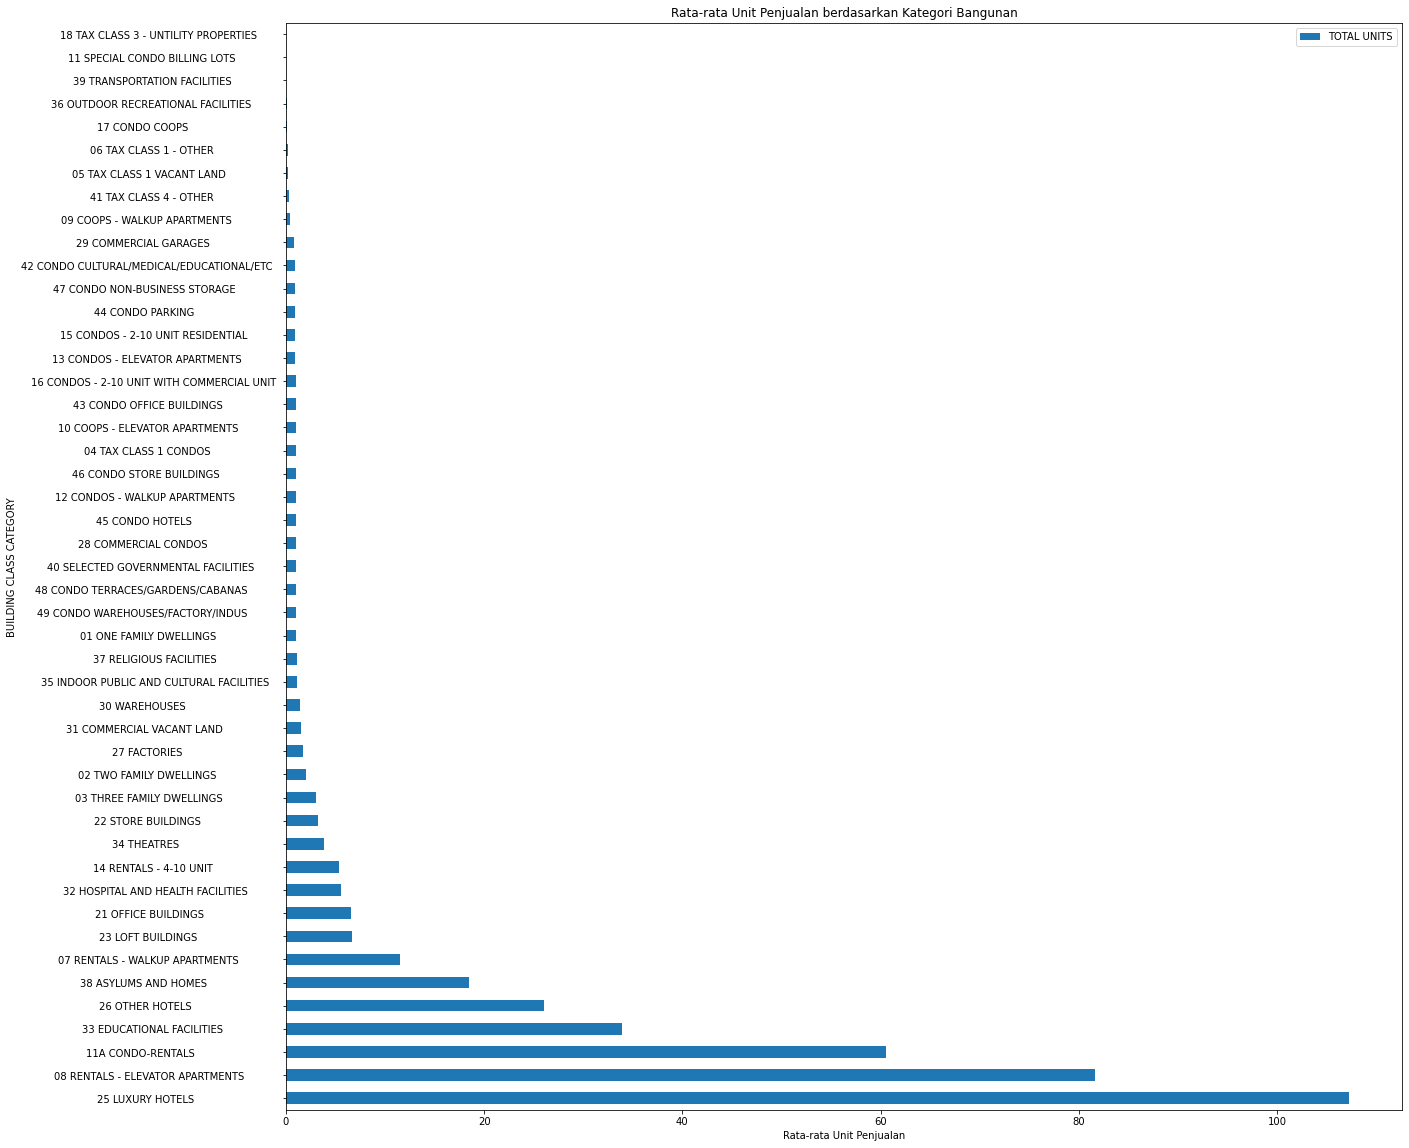

In [18]:
mean_unit_kategori.plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Rata-rata Unit Penjualan berdasarkan Kategori Bangunan') #nama grafik
plt.xlabel('Rata-rata Unit Penjualan') #nama x-axis

Berdasarkan ukuran pemusatan data MEAN terlihat pada tabel bahwasanya kategori bangunan Luxury Hotels merupakan kategori dengan jumlah unit tertinggi yang terjual di New York sedangkan jumlah unit terendah ada pada bangunan Transportation Facilities, Special Condo Billing Lots, dan Tax Class 3 - Untility Properties

# MEDIAN

In [19]:
median_unit_kategori = pd.DataFrame(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].median().sort_values(ascending=False))  
median_unit_kategori

,TOTAL UNITS
BUILDING CLASS CATEGORY,
08 RENTALS - ELEVATOR APARTMENTS,48.0
11A CONDO-RENTALS,12.0
07 RENTALS - WALKUP APARTMENTS,6.0
23 LOFT BUILDINGS,6.0
14 RENTALS - 4-10 UNIT,5.0
03 THREE FAMILY DWELLINGS,3.0
34 THEATRES,2.5
26 OTHER HOTELS,2.0
02 TWO FAMILY DWELLINGS,2.0


Text(0.5, 0, 'Median Unit Penjualan')

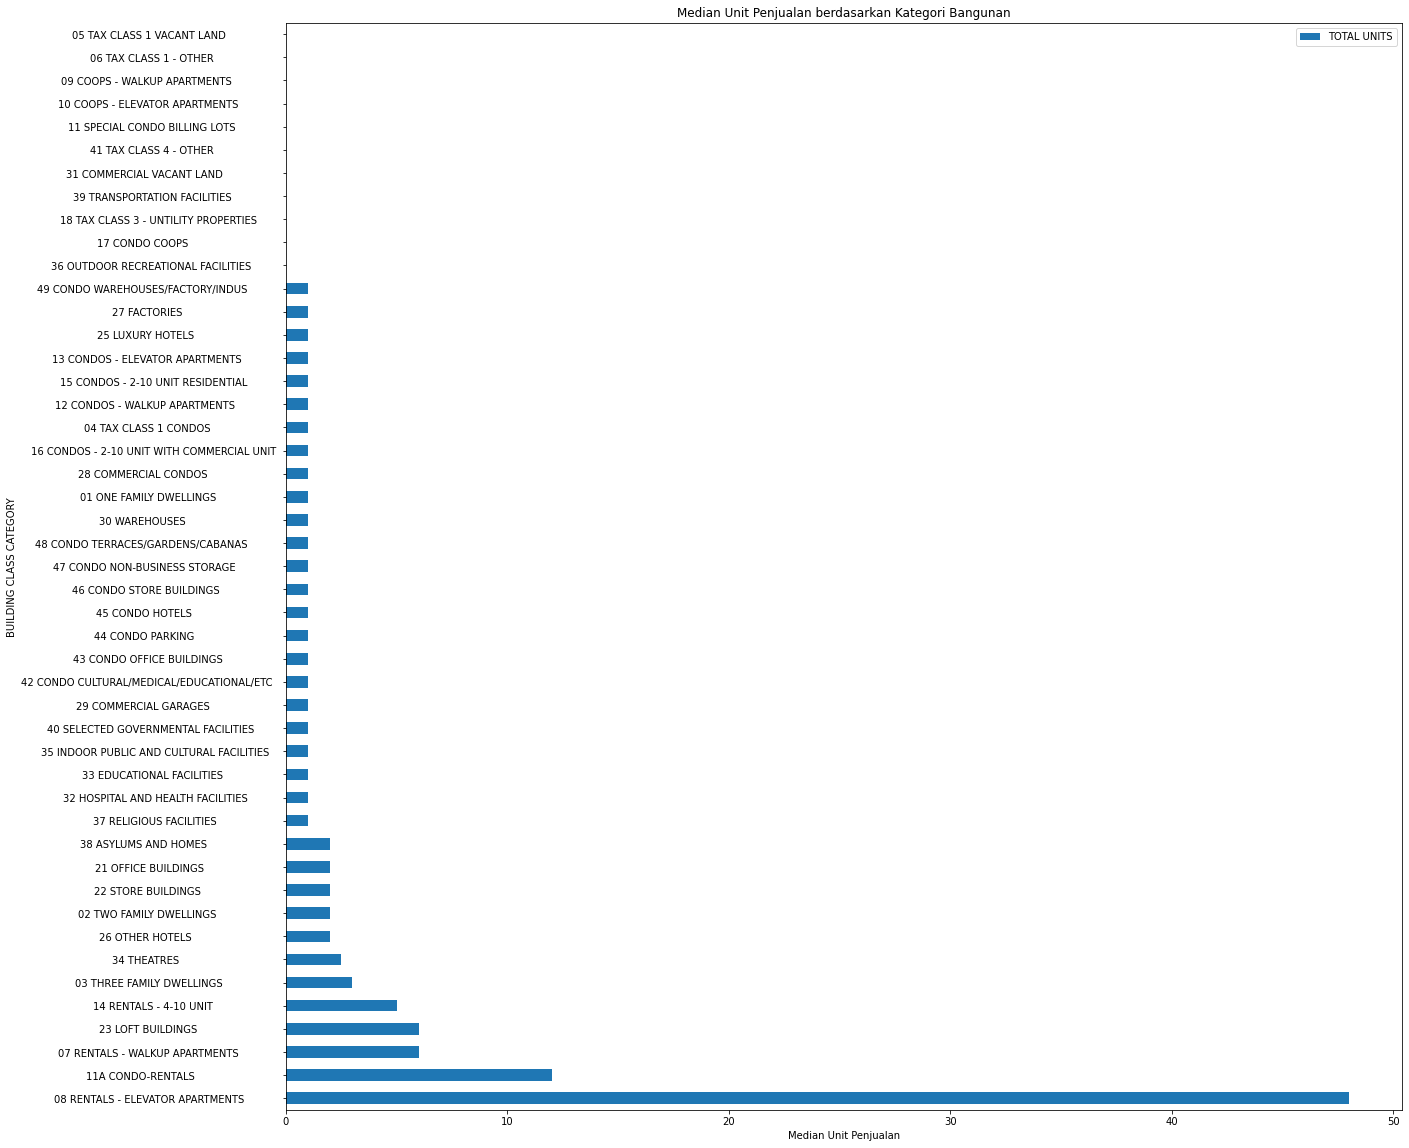

In [20]:
median_unit_kategori.plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Median Unit Penjualan berdasarkan Kategori Bangunan') #nama grafik
plt.xlabel('Median Unit Penjualan') #nama x-axis

Berdasarkan ukuran pemusatan data MEDIAN terlihat pada tabel bahwasanya kategori bangunan Rentals - Elevator Apartments merupakan kategori dengan jumlah unit tertinggi yang terjual di New York sedangkan jumlah unit terendah ada pada beberapa bangunan dengan nilai median 0

# MODE

In [21]:
df1['BUILDING CLASS CATEGORY'].mode()

0    01 ONE FAMILY DWELLINGS                    
Name: BUILDING CLASS CATEGORY, dtype: object

In [22]:
mode_unit_kategori = df1['BUILDING CLASS CATEGORY'].value_counts()
mode_unit_kategori

01 ONE FAMILY DWELLINGS                         18235
02 TWO FAMILY DWELLINGS                         15828
13 CONDOS - ELEVATOR APARTMENTS                 12989
10 COOPS - ELEVATOR APARTMENTS                  12902
03 THREE FAMILY DWELLINGS                        4384
07 RENTALS - WALKUP APARTMENTS                   3466
09 COOPS - WALKUP APARTMENTS                     2767
04 TAX CLASS 1 CONDOS                            1656
44 CONDO PARKING                                 1441
15 CONDOS - 2-10 UNIT RESIDENTIAL                1281
05 TAX CLASS 1 VACANT LAND                       1248
17 CONDO COOPS                                   1201
22 STORE BUILDINGS                                935
12 CONDOS - WALKUP APARTMENTS                     926
14 RENTALS - 4-10 UNIT                            671
29 COMMERCIAL GARAGES                             587
43 CONDO OFFICE BUILDINGS                         475
31 COMMERCIAL VACANT LAND                         463
08 RENTALS - ELEVATOR APARTM

Text(0.5, 0, 'jumlah')

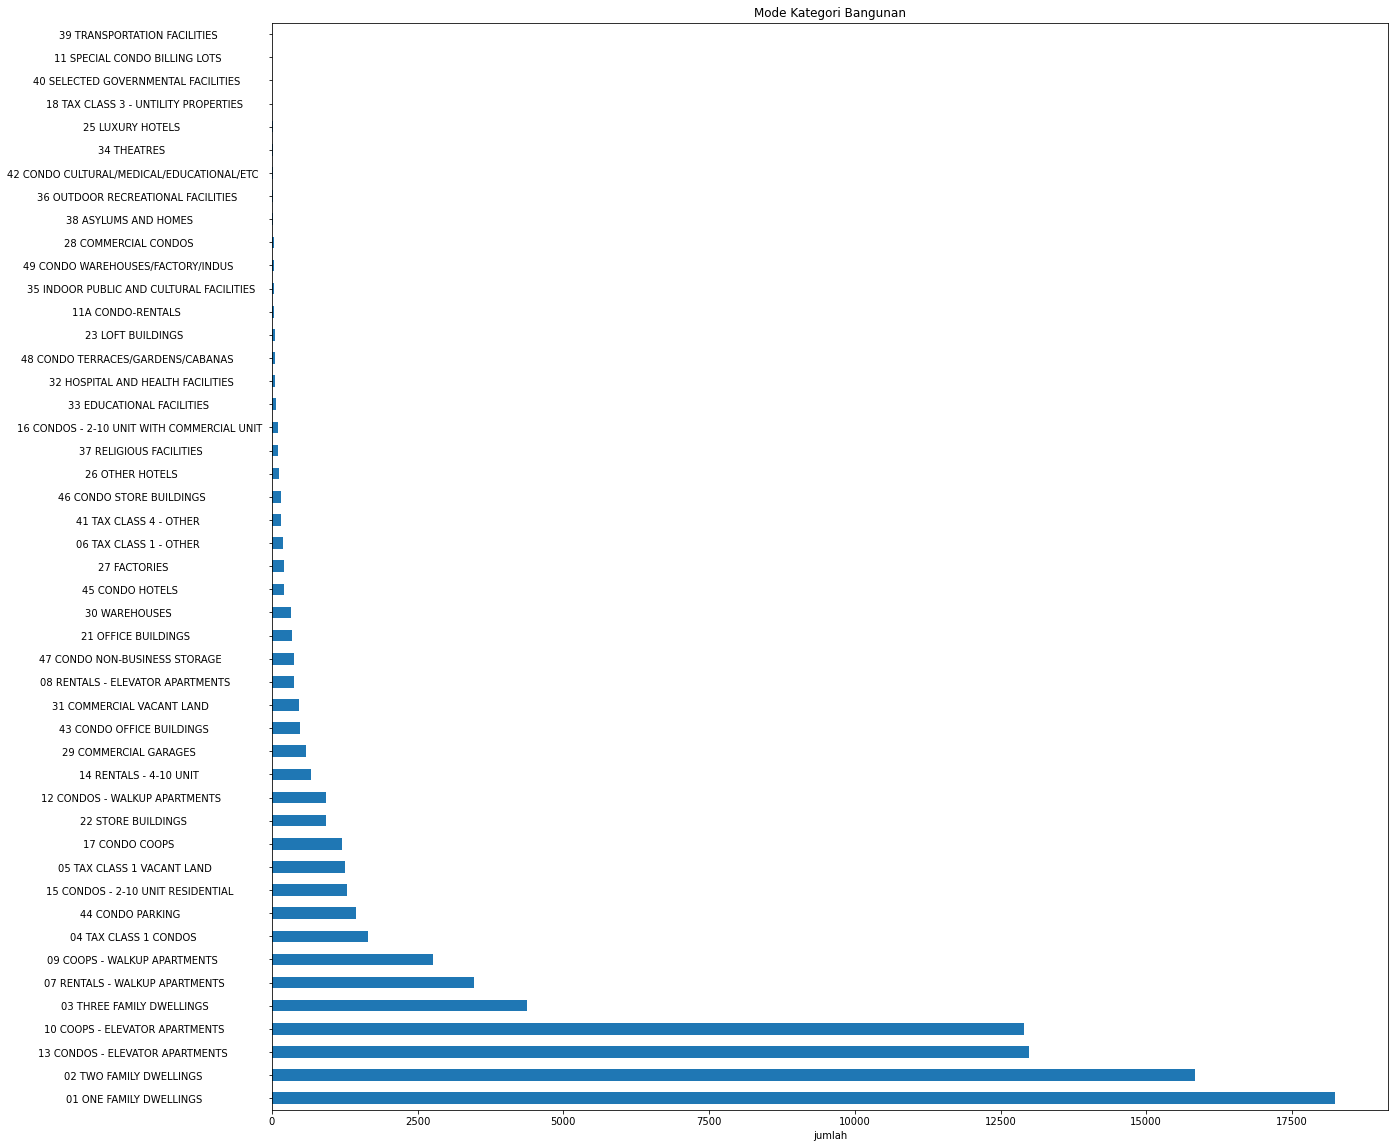

In [23]:
mode_unit_kategori.plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Mode Kategori Bangunan') #nama grafik
plt.xlabel('jumlah') #nama x-axis

Berdasarkan ukuran pemusatan data MODE terlihat pada tabel bahwasanya kategori One Family Dwellings merupakan kategori dengan jumlah unit tertinggi yang terjual di New York sedangkan jumlah unit terendah ada pada bangunan Transportation Facilities

Terlihat jelas bahwa Mean, Median, dan Modus pada jumlah penjualan unit bangunan memiliki perbedaan yang cukup signifikan pada data penjualan di Kota New York hal ini disebabkan karena banyaknya data yang outlier.

# Range

In [24]:
range_unit_kategori = pd.DataFrame(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].sum())  
range_unit_kategori['RANGE'] = (df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].max())-(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].min())
range_unit_kategori.sort_values(by='RANGE', ascending=False, inplace=True)
range_unit_kategori

,TOTAL UNITS,RANGE
BUILDING CLASS CATEGORY,,
33 EDUCATIONAL FACILITIES,2342,2261
10 COOPS - ELEVATOR APARTMENTS,12677,1866
08 RENTALS - ELEVATOR APARTMENTS,31179,950
07 RENTALS - WALKUP APARTMENTS,39989,734
25 LUXURY HOTELS,1287,537
26 OTHER HOTELS,2972,436
31 COMMERCIAL VACANT LAND,703,422
11A CONDO-RENTALS,2605,405
09 COOPS - WALKUP APARTMENTS,1202,296


Text(0.5, 0, 'range')

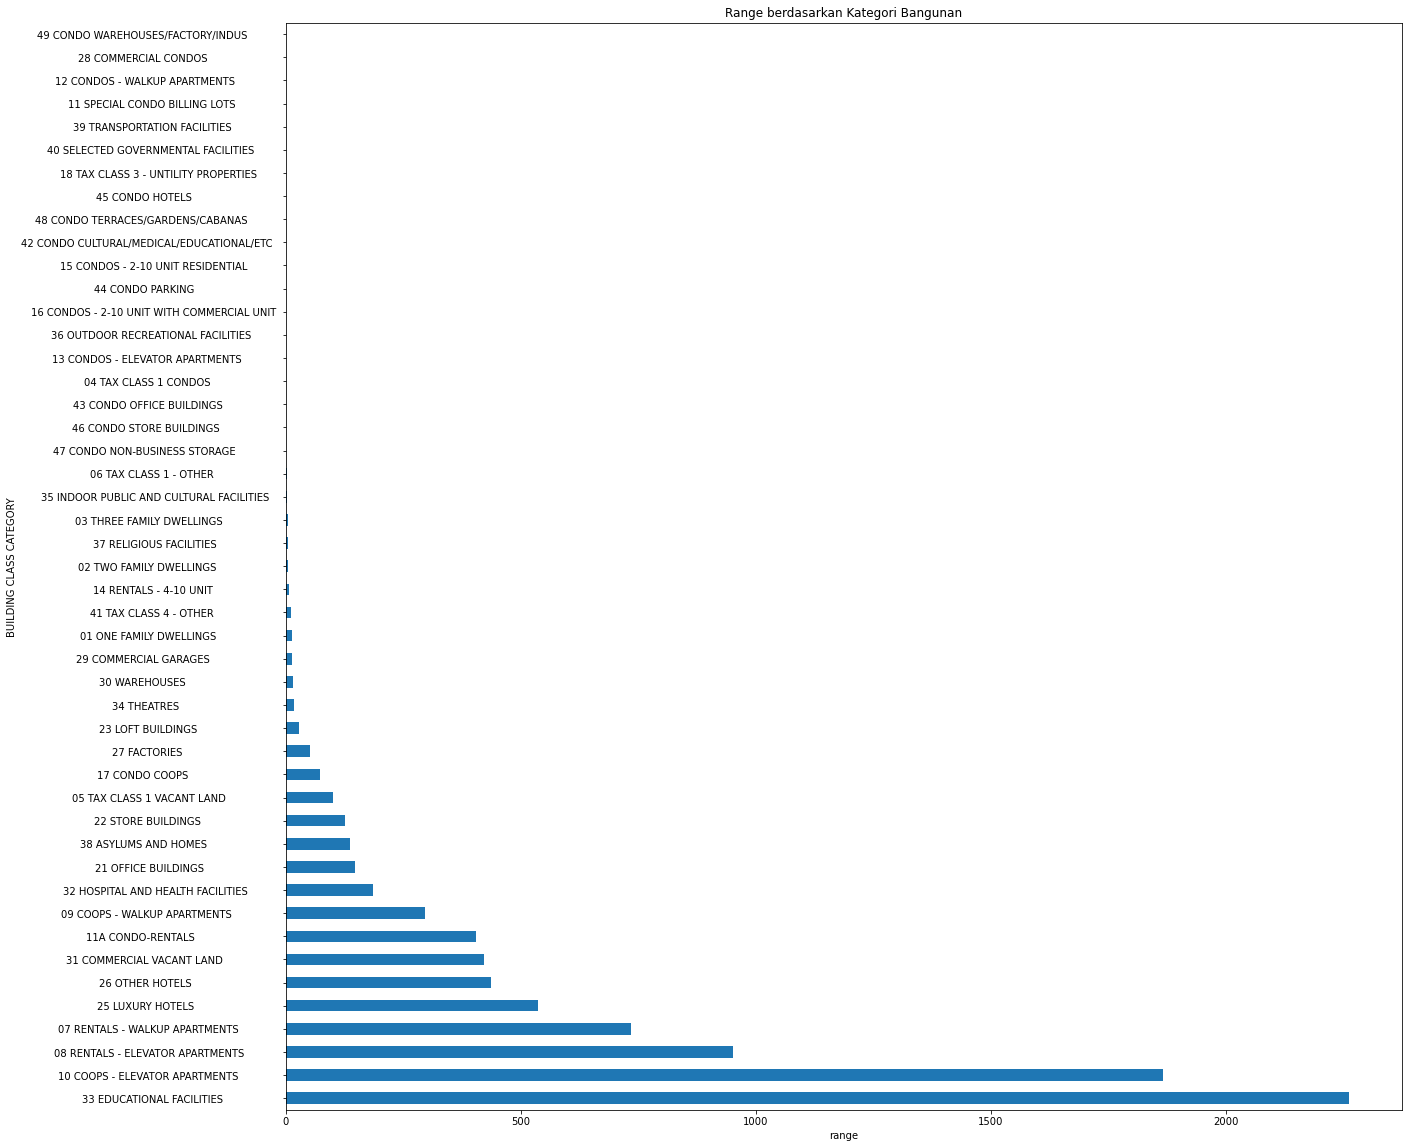

In [25]:
range_unit_kategori['RANGE'].plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Range berdasarkan Kategori Bangunan') #nama grafik
plt.xlabel('range') #nama x-axis

kategori bangunan dengan range tertinggi adalah bangunan Educational Facilities sehingga kategori tersebut merupakan kategori dengan ukuran penyebaran data yang paling besar, sedangkan range terendah ada pada beberapa kategori bangunan yang memiliki nilai range 0

In [26]:
range_unit_kategori = df1['TOTAL UNITS'].to_numpy()
np.ptp(range_unit_kategori)

2261

perbedaan nilai tertinggi dengan nilai terendah pada keseluruhan kategori bangunan adalah 2261

# VARIANCE

In [27]:
variance_unit_kategori = pd.DataFrame(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].var(ddof=1))  
variance_unit_kategori.sort_values(by='TOTAL UNITS', ascending=False, inplace=True)
variance_unit_kategori

,TOTAL UNITS
BUILDING CLASS CATEGORY,
33 EDUCATIONAL FACILITIES,74011.055413
25 LUXURY HOTELS,39148.204545
08 RENTALS - ELEVATOR APARTMENTS,15012.152128
11A CONDO-RENTALS,10014.630122
26 OTHER HOTELS,6679.198572
38 ASYLUMS AND HOMES,1393.093333
10 COOPS - ELEVATOR APARTMENTS,904.983263
07 RENTALS - WALKUP APARTMENTS,741.389213
32 HOSPITAL AND HEALTH FACILITIES,578.495617


Text(0.5, 0, 'Variance')

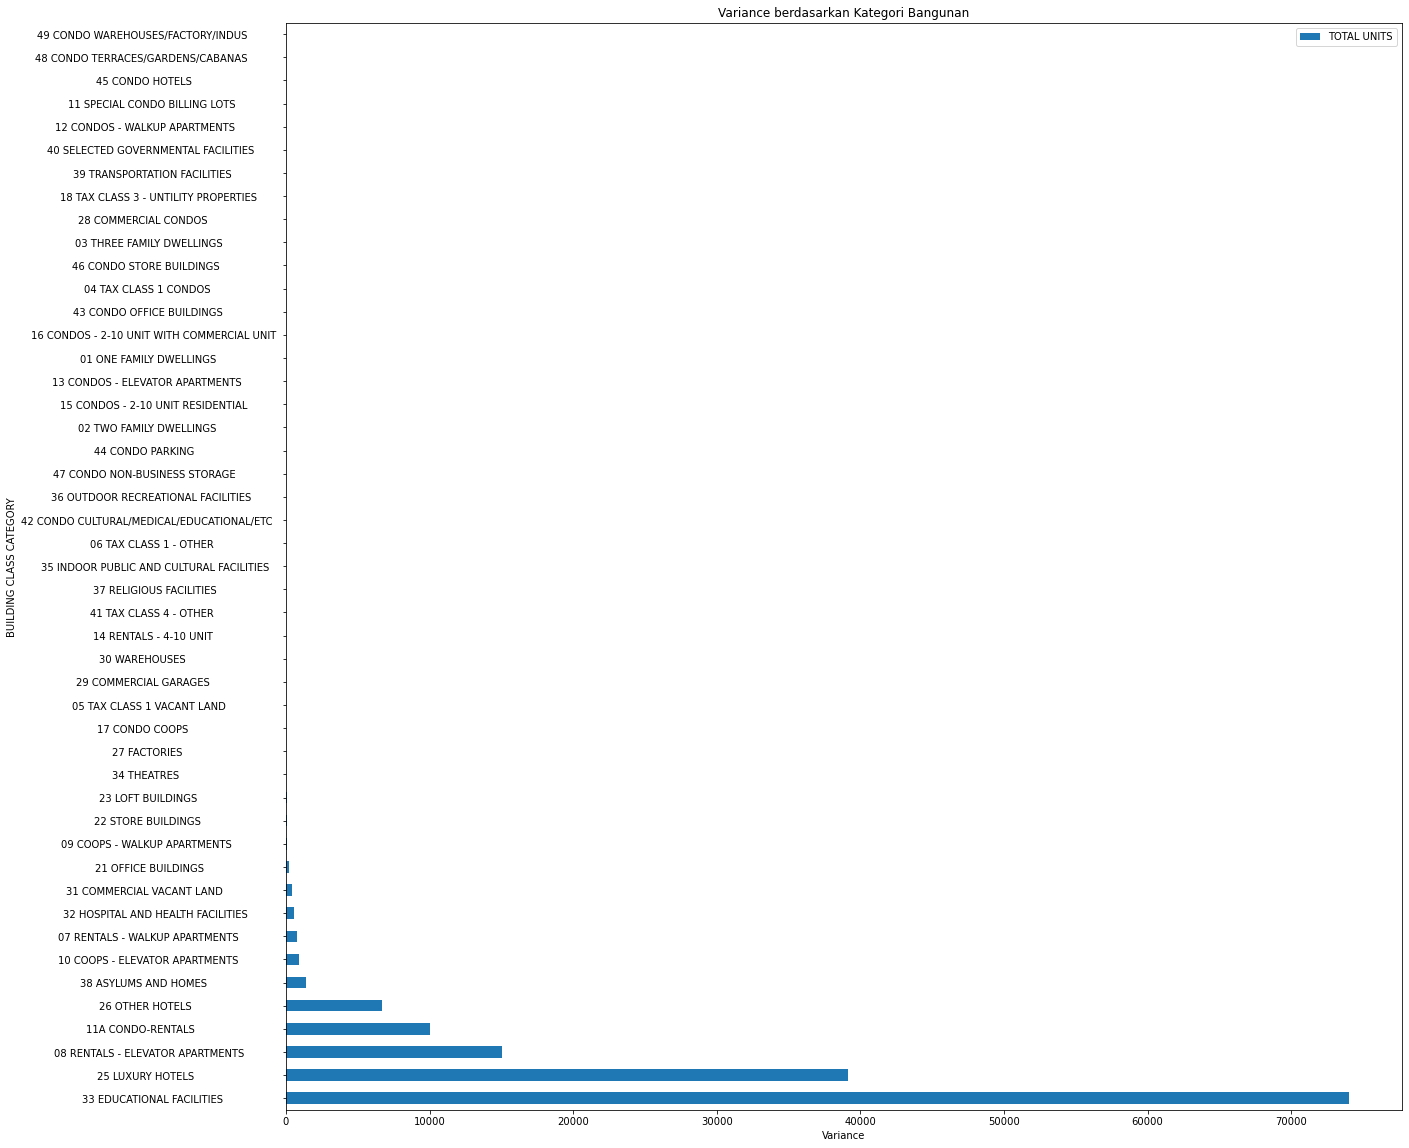

In [28]:
variance_unit_kategori.plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Variance berdasarkan Kategori Bangunan') #nama grafik
plt.xlabel('Variance') #nama x-axis

kategori bangunan dengan variance tertinggi adalah bangunan Educational Facilities sehingga kategori tersebut merupakan kategori dengan ukuran penyebaran data yang paling besar, sedangkan variance terendah ada pada beberapa kategori bangunan yang memiliki nilai variance 0

In [29]:
variance_unit_kategori = df1['TOTAL UNITS'].to_numpy()
np.var(variance_unit_kategori, ddof=1)

359.958960030383

variance pada keseluruhan kategori bangunan adalah 359.96

# STANDARD DEVIATION

In [30]:
std_unit_kategori = pd.DataFrame(df1.groupby('BUILDING CLASS CATEGORY')['TOTAL UNITS'].std(ddof=1))  
std_unit_kategori.sort_values(by='TOTAL UNITS', ascending=False, inplace=True)
std_unit_kategori

,TOTAL UNITS
BUILDING CLASS CATEGORY,
33 EDUCATIONAL FACILITIES,272.049730
25 LUXURY HOTELS,197.859052
08 RENTALS - ELEVATOR APARTMENTS,122.524088
11A CONDO-RENTALS,100.073124
26 OTHER HOTELS,81.726364
38 ASYLUMS AND HOMES,37.324166
10 COOPS - ELEVATOR APARTMENTS,30.082940
07 RENTALS - WALKUP APARTMENTS,27.228463
32 HOSPITAL AND HEALTH FACILITIES,24.051936


Text(0.5, 0, 'Standard Deviation')

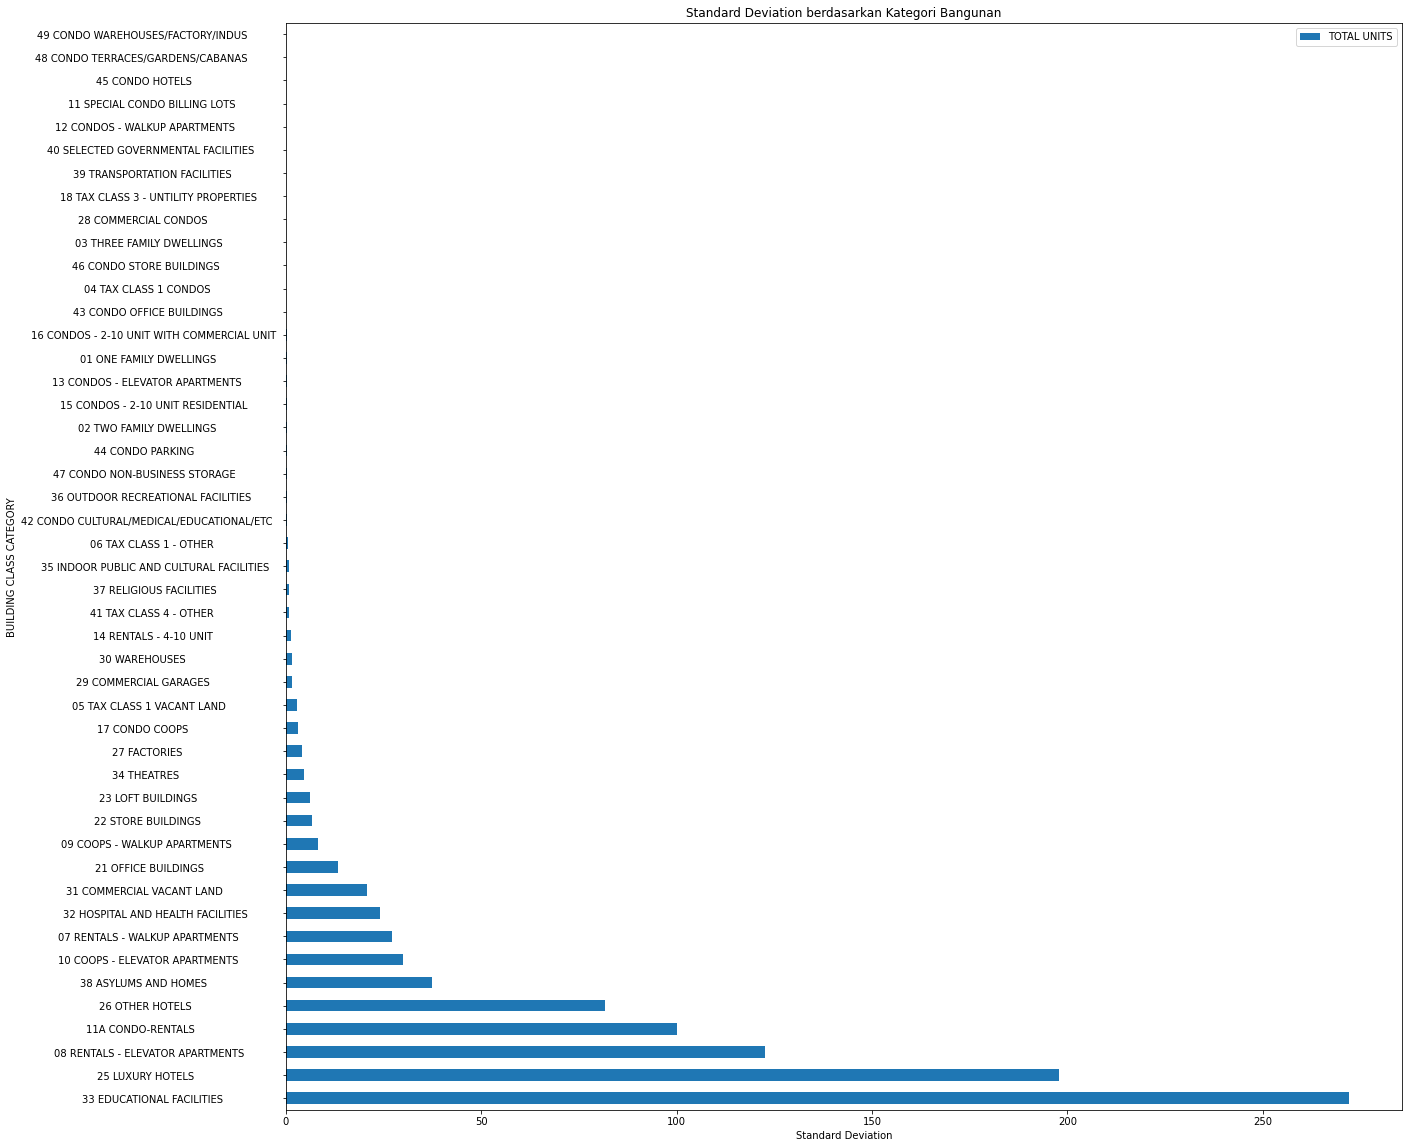

In [31]:
std_unit_kategori.plot(kind='barh', figsize=(20,20)) #bar horizontal
plt.title('Standard Deviation berdasarkan Kategori Bangunan') #nama grafik
plt.xlabel('Standard Deviation') #nama x-axis

kategori bangunan dengan standard deviation tertinggi adalah bangunan Educational Facilities sehingga kategori tersebut merupakan kategori dengan ukuran penyebaran data yang paling besar, sedangkan standard deviation terendah ada pada beberapa kategori bangunan yang memiliki nilai standard deviation 0

In [32]:
std_unit_kategori = df1['TOTAL UNITS'].to_numpy()
np.std(std_unit_kategori, ddof=1)

18.97258443202673

standard deviation pada keseluruhan kategori bangunan adalah 359.96

# PROBABILITY DISTRIBUTION

In [33]:
df1.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,1.056623e+06
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,1.038794e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [34]:
df2 = df1[df1['TOTAL UNITS']>0]
df2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,NaN,10009,28,3,31,4616,18690,1900,2,C7,0.0,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,NaN,10009,16,1,17,2212,7803,1900,2,C7,0.0,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,NaN,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,NaN,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,NaN,10309,2,0,2,2400,2575,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,NaN,10309,2,0,2,2498,2377,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,NaN,10309,2,0,2,4000,1496,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,NaN,10309,0,7,7,208033,64117,2001,4,K6,11693337.0,2016-12-21


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


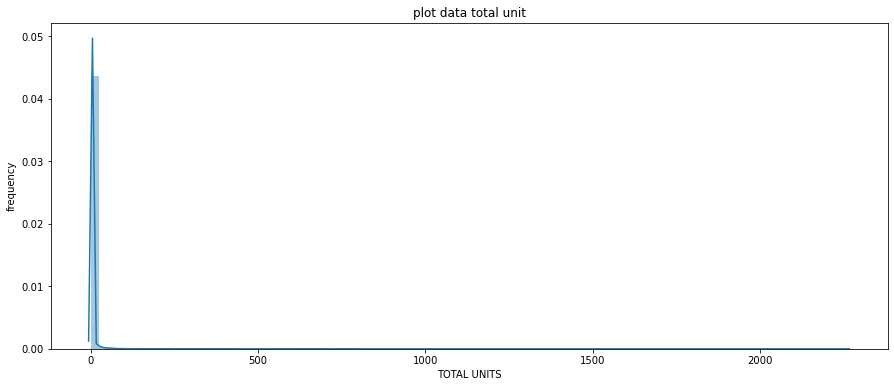

In [35]:
plt.figure(figsize=(15,6))
sns.distplot(
    df2['TOTAL UNITS'],
    kde=True, 
    bins=100
)
plt.title('plot data total unit')
plt.ylabel('frequency')
plt.show()

berdasarkan plot tersebut terlihat bahwa data tersebut memiliki distribusi eksponensial dimana data tersebut merupakan data yang kontinu dan berada pada tingkat rata-rata yang konstan yaitu 2.249184

# CONFIDENCE INTERVALS

In [36]:
#memnuat kolom agregasi untuk beberapa perhitungan berdasarkan kategori bangunan
df1.groupby('BUILDING CLASS CATEGORY').agg({'TOTAL UNITS':[np.mean, np.std, np.size]})

TOTAL UNITS                   
                                                    mean         std   size
BUILDING CLASS CATEGORY                                                    
01 ONE FAMILY DWELLINGS                         1.022649    0.174565  18235
02 TWO FAMILY DWELLINGS                         2.050227    0.223001  15828
03 THREE FAMILY DWELLINGS                       2.996578    0.094267   4384
04 TAX CLASS 1 CONDOS                           0.984300    0.124352   1656
05 TAX CLASS 1 VACANT LAND                      0.196314    2.909060   1248
06 TAX CLASS 1 - OTHER                          0.164835    0.440084    182
07 RENTALS - WALKUP APARTMENTS                 11.537507   27.228463   3466
08 RENTALS - ELEVATOR APARTMENTS               81.620419  122.524088    382
09 COOPS - WALKUP APARTMENTS                    0.434405    8.114417   2767
10 COOPS - ELEVATOR APARTMENTS                  0.982561   30.082940  12902
11 SPECIAL CONDO BILLING LOTS                   0.000000    0.000000      2
11A CONDO-RENTALS                              60.581395  100.073124     43
12 CONDOS - WALKUP APARTMENTS                   1.000000    0.000000    926
13 CONDOS - ELEVATOR APARTMENTS                 0.961044    0.193498  12989
14 RENTALS - 4-10 UNIT                          5.345753    1.416210    671
15 CONDOS - 2-10 UNIT RESIDENTIAL               0.954723    0.207993   1281
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT      0.979167    0.143576     96
17 CONDO COOPS                                  0.155704    3.175936   1201
18 TAX CLASS 3 - UNTILITY PROPERTIES            0.000000    0.000000      4
21 OFFICE BUILDINGS                             6.585714   13.364509    350
22 STORE BUILDINGS                              3.195722    6.633668    935
23 LOFT BUILDINGS                               6.652174    6.204720     46
25 LUXURY HOTELS                              107.250000  197.859052     12
26 OTHER HOTELS                                26.070175   81.726364    114
27 FACTORIES                                    1.726368    4.004966    201
28 COMMERCIAL CONDOS                            1.000000    0.000000     30
29 COMMERCIAL GARAGES                           0.834753    1.572465    587
30 WAREHOUSES                                   1.429448    1.551057    326
31 COMMERCIAL VACANT LAND                       1.518359   20.686466    463
32 HOSPITAL AND HEALTH FACILITIES               5.508475   24.051936     59
33 EDUCATIONAL FACILITIES                      33.942029  272.049730     69
34 THEATRES                                     3.833333    4.648232     12
35 INDOOR PUBLIC AND CULTURAL FACILITIES        1.125000    0.659912     32
36 OUTDOOR RECREATIONAL FACILITIES              0.071429    0.267261     14
37 RELIGIOUS FACILITIES                         1.070000    0.742028    100
38 ASYLUMS AND HOMES                           18.480000   37.324166     25
39 TRANSPORTATION FACILITIES                    0.000000    0.000000      2
40 SELECTED GOVERNMENTAL FACILITIES             1.000000    0.000000      2
41 TAX CLASS 4 - OTHER                          0.259494    0.882818    158
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC       0.923077    0.277350     13
43 CONDO OFFICE BUILDINGS                       0.981053    0.136483    475
44 CONDO PARKING                                0.934074    0.248240   1441
45 CONDO HOTELS                                 1.000000    0.000000    211
46 CONDO STORE BUILDINGS                        0.987013    0.113588    154
47 CONDO NON-BUSINESS STORAGE                   0.931034    0.253732    377
48 CONDO TERRACES/GARDENS/CABANAS               1.000000    0.000000     47
49 CONDO WAREHOUSES/FACTORY/INDUS               1.000000    0.000000     30

In [37]:
#menggunakan data kategori bangunan Luxury Hotels
mean = 107.25 #mean
std = 197.86 #standard deviasi
n = 12 #total data
z_score = 1.96 #nilai z-score adalah 1.96 untuk CI 95% 

In [38]:
#standard error
se = std/np.sqrt(n)

In [39]:
#nilai z-score adalah 1.96 untuk CI 95% 
lcb = mean - z_score * se #batas bawah CI
ucb = mean + z_score * se #batas atas CI
lcb, ucb

(-4.699833776622171, 219.19983377662217)

terlihat bahwa rata-rata total unit kategori bangunan Luxury Hotels yaitu 107.25 berada pada confidence interval -4.699833776622171 sampai 219.19983377662217

# HYPOTHESIS TEST

## PEARSON CORELATION TEST

H0 : kedua kolom independen \
H1 : kedua kolom dependen

In [40]:
from scipy.stats import pearsonr
stat, p = pearsonr(df1['TOTAL UNITS'], df1['SALE PRICE'])
print('stat=%.3f, p=%.3f' %(stat,p))
if p>0.05:
    print('kedua kolom independen')
else:
    print('kedua kolom dependen')

stat=0.103, p=0.000
kedua kolom dependen


terlihat pada perhitungan bahwa kedua kolom bersifat dependen dimana nilai p-valuenya adalah 0 sehingga kedua kolom tersebut tidak memiliki korelasi yang kuat

C:\Users\Fahrurrroji\AppData\Local\Temp\ipykernel_3432\3280500677.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

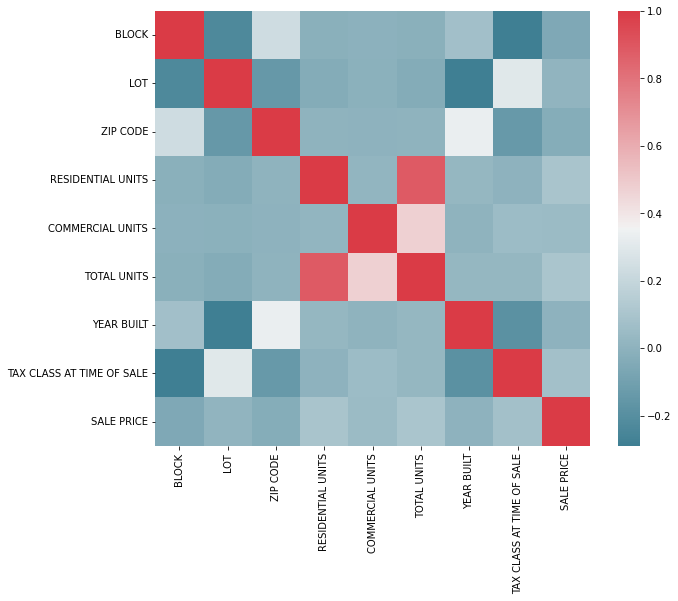

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)